In [1]:
from base import *
from bayes import *

1) Dimensionalidad: Repita el punto de dimensionalidad del Práctico 1, usando el Clasificador Naive-Bayes con Gaussianas. Genere una gráfica incluyendo también los resultados de redes y árboles.



In [11]:
from sklearn.metrics import accuracy_score

ej1_error_data = []

def calcular_error(y_df, predict_df, n, nombre, generador):
  acc_train = accuracy_score(y_df, predict_df)
  ej1_error_data.append([1-acc_train, n, nombre + " " + generador])

def entrenar_d(d, df_test, generador):
  if generador == 'diagonal':
    df_train = GeneradorDFDiagonal(C=0.78, d=d, n=250).generar_clase()
  else:
    df_train = GeneradorDFParalelo(C=0.78, d=d, n=250).generar_clase()

  X_train, y_train = df_train[list(range(d))], df_train['Clase']
  X_test, y_test = df_test[list(range(d))], df_test['Clase']

  gauss = Bayes().gausianas()
  gauss.fit(X_train, y_train)

  df_train_entrenado = gauss.predict(X_train)
  df_test_entrenado = gauss.predict(X_test)

  calcular_error(y_train, df_train_entrenado, d, "Bayes - Train", generador)
  calcular_error(y_test, df_test_entrenado, d, "Bayes - Test", generador)


def ejercicio_uno():
  d_valores = [2, 4, 8, 16, 32]

  for d in d_valores:
    df_test_diag = GeneradorDFDiagonal(C=0.78, d=d, n=10000).generar_clase()
    df_test_paral = GeneradorDFParalelo(C=0.78, d=d, n=10000).generar_clase()

    for i in range(20):
      entrenar_d(d, df_test_diag, 'diagonal')
      entrenar_d(d, df_test_paral, 'paralelo')
  
  return pd.DataFrame(ej1_error_data, columns=['Error', 'd', 'Clase'])

In [12]:
errores_bayes = ejercicio_uno()

In [13]:
errores_bayes.to_csv("datasets/ej1_errores_bayes.csv", index=False)

In [29]:
def graph_errores_ej1(error_df: pd.DataFrame, referencia):
  fig, ax = plt.subplots(figsize=(15, 10))
  clases = pd.unique(error_df['Clase'])

  for c in clases:
    df = error_df[error_df['Clase'] == c]
    df = df.groupby(referencia).mean().reset_index()

    switch={
      "Bayes - Train paralelo": "solid",
      "Bayes - Test paralelo": "solid",
      "Bayes - Train diagonal": "solid",
      "Bayes - Test diagonal": "solid",
      "Traindiagonal": "dashed",
      "Trainparalelo": "dashed",
      "Testdiagonal": "dashed",
      "Testparalelo": "dashed"
    }
    
    plt.plot(df[referencia], df['Error'], linestyle=switch.get(c, "dashdot"))

  ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

  plt.legend(clases, ncol = 4)
  plt.xlabel(referencia, size=14, labelpad=20)
  plt.ylabel('Error', size=14, labelpad=20)

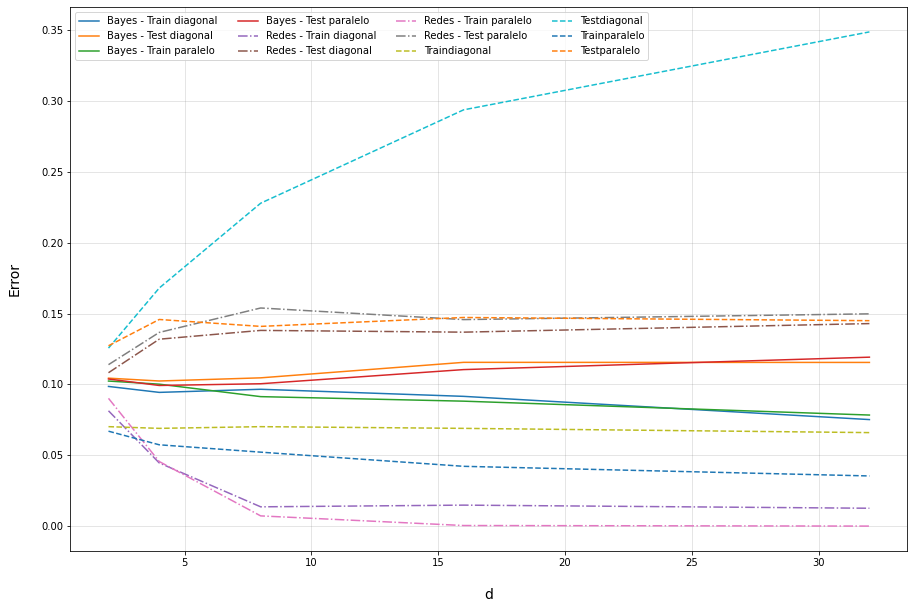

In [30]:
errores_redes = pd.read_csv("datasets/ej5_errores_redes.csv")
errores_arboles = pd.read_csv("datasets/ej5_errores_arboles.csv")
errores_bayes = pd.read_csv("datasets/ej1_errores_bayes.csv")

ej5_errores = pd.concat([errores_bayes, errores_redes, errores_arboles])
graph_errores_ej1(ej5_errores, 'd')

Se puede notar que los valores de errores de test en el modelo de Bayes son mejores todos los casos comparados con los modelos de árboles y redes. Esto puede deducirse a partir de la generación de los puntos: tanto para el problema diagonal como el paralelo, estos surgen a partir de una distribución gaussiana. Además, como se generan a partir de una matriz de covarianza diagonal, las coordenadas de los puntos son independientes entre sí. 

---

2) Límites del clasificador: Resuelva el problema de dos-elipses utilizando el Clasificador Naive-Bayes  con Gaussianas. Realice una gráfica de la predicción sobre el conjunto de test. Compare el resultado con el obtenido con redes. Resuelva el problema de las espirales-anidadas, y también realice la gráfica y compare con el resultado de redes. Explique por qué se obtienen esos resultados. Use la misma cantidad de datos de entrenamiento y test que en los problemas del práctico de redes.

In [11]:
from sklearn.model_selection import train_test_split

def ej2_dfs():
  dos_e_dfs = GeneradorDFCSV(filename="dos_elipses")

  # Se toma una muestra aleatoria de la mitad de df_data ya que el dataset cuenta con 1000 filas. 
  df_train_val = dos_e_dfs.df_data.sample(frac=0.5)
  X_train_val, y_train_val = df_train_val[[0, 1]], df_train_val['Clase']
  X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

  df_test = dos_e_dfs.df_test
  X_test, y_test = df_test[[0, 1]], df_test['Clase']

  return X_train, y_train, X_test, y_test, X_val, y_val

def ej2():
  X_train, y_train, X_test, y_test, _, _ = ej2_dfs()

  gauss = Bayes().gausianas()
  gauss.fit(X_train, y_train)

  predict_data = gauss.predict(X_test)
  test_frame = {0: X_test[0], 1: X_test[1], 'Clase': predict_data}

  return pd.DataFrame(test_frame, columns=[0,1,'Clase'])


In [3]:
df_test_entrenado = ej2()
# print(df_train_entrenado)
df_test_entrenado.to_csv("./datasets/ej2/bayes_df_train.csv", index=False)

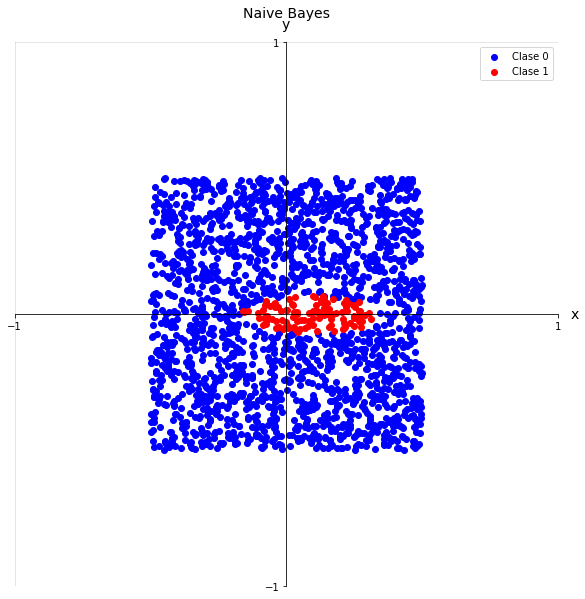

In [4]:
GraficadorDF(df_test_entrenado).graph_puntos(titulo='Naive Bayes')

In [ ]:
df_test_ann = pd.read_csv('datasets/ej2/df_train.csv', header=0, names = [0,1,'Clase'])
# print(df_test_ann)

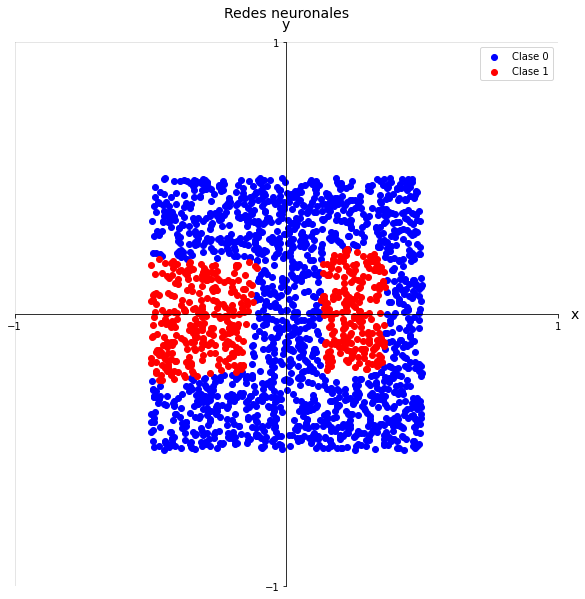

In [12]:
GraficadorDF(df_test_ann).graph_puntos(titulo='Redes neuronales')

Se puede ver claramente que los resultados de Bayes son mucho peores a los obtenidos anteriormente con redes neuronales. No se me ocurre razón por la cual esto sucede.

---

3. Para el algoritmo Naive-Bayes con histogramas vamos a usar la implementacion de CategoricalNB de Sklearn. Para poder usarla primero tenemos que convertir nuestras variables continuas en categóricas, o sea en un histograma, usando un discretizador. Desarrolle una función que entrene un clasificador Naive-Bayes con histogramas, usando un conjunto de validación para determinar el número óptimo de bins del histograma. Las opciones para el clasificador y el discretizador son las siguientes:

```python
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
bins=5
discretizador = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
#
#código propio
#
clf = CategoricalNB(min_categories=bins)
clf.fit(X_discreto,y_train)
#
#más código propio
```

La función es similar a la que hicieron para entrenar redes. Tiene que recibir los conjuntos de entrenamiento, validación y test, el discretizador y el clasificador, y los valores a probar del número de bins, y tiene que devolver los errores para hacer curvas de error versus número de bins, y el discretizador y el clasificador óptimo entrenados.

**La función se encuentra en el archivo [bayes_categorico](bayes_categorico.py).**

---

4. Usando la función implementada repita el trabajo sobre los problemas de dos-elipses y de espirales-anidadas, usando conjuntos de validación y cantidad de bines adecuados. Grafique el error de clasificación en ajuste, validación y test en función de dicho número de bins (hay sobreajuste?). Con el clasificador óptimo grafique las clasificaciones en test. Compárelos con los resultados del punto 2).

In [12]:
from bayes_categorico import train_bayes_categorico

def graph_errores_ej4(error_df: pd.DataFrame, referencia):
  fig, ax = plt.subplots(figsize=(15, 10))
  clases = pd.unique(error_df['Clase'])

  for c in clases:
    df = error_df[error_df['Clase'] == c]
    df = df.groupby(referencia).mean().reset_index()
    
    plt.plot(df[referencia], df['Error'], linestyle='-')

  ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

  plt.legend(clases, ncol = 4)
  plt.xlabel(referencia, size=14, labelpad=20)
  plt.ylabel('Error', size=14, labelpad=20)


def ej4():
  X_train, y_train, X_test, y_test, X_val, y_val = ej2_dfs()  
  n_bins = range(4, 102, 2)
  best_bins, best_clf, best_kbdisc, df_errores = train_bayes_categorico(n_bins, X_train, y_train, X_val, y_val, X_test, y_test)

  X_test_discreto = best_kbdisc.transform(X_test.copy())
  predict_test = best_clf.predict(X_test_discreto)

  frame = {0 : X_test[0], 1 : X_test[1], 'Clase' : predict_test}
  df_test_entrenado = pd.DataFrame(frame, columns=[0, 1, 'Clase'])

  print(f"Se retorna un dataframe entrenado con la mejor cantidad de bins: {best_bins}.")
  return df_test_entrenado, df_errores

In [13]:
df_test_entrenado, df_errores = ej4()
df_test_elipses = GeneradorDFCSV(filename="dos_elipses").df_data

Se retorna un dataframe entrenado con la mejor cantidad de bins: 10.


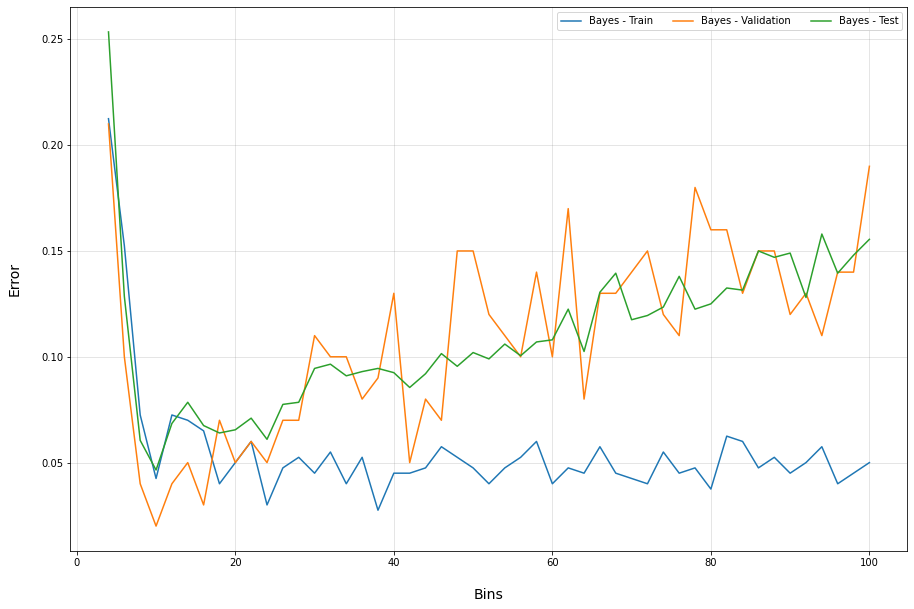

In [14]:
graph_errores_ej4(df_errores, 'Bins')

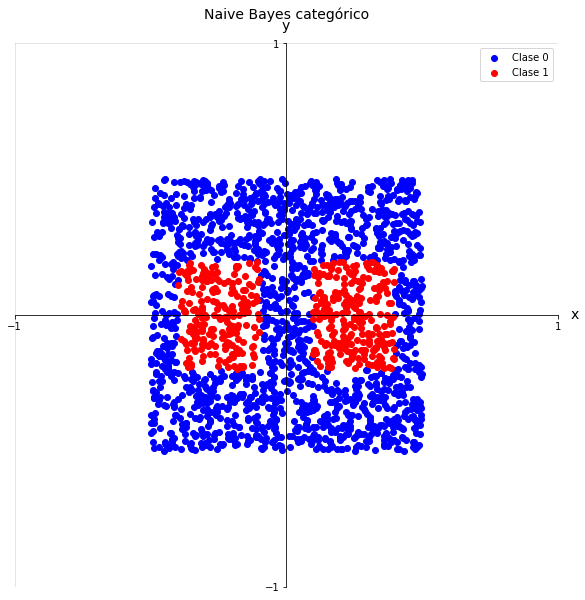

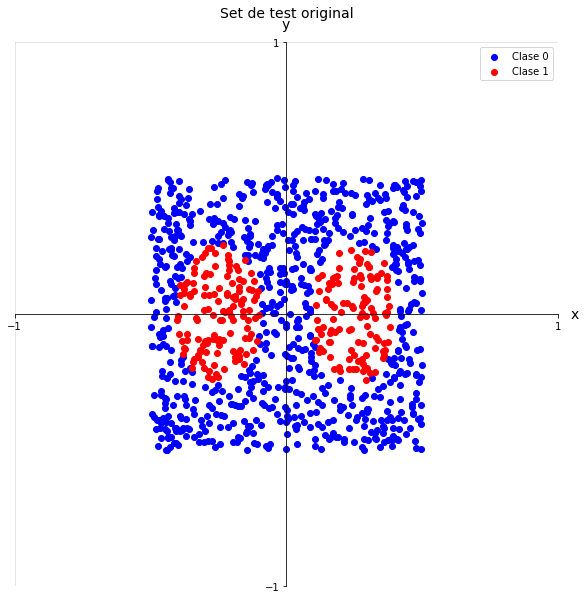

In [15]:
GraficadorDF(df_test_entrenado).graph_puntos(titulo='Naive Bayes categórico')
GraficadorDF(df_test_elipses).graph_puntos(titulo='Set de test original')

Se puede observar que los resultados son muchísimo mejores a los obtenidos en el ejercicio 2. El error obtenido es muy bajo. 

---

In [16]:
from sklearn.model_selection import train_test_split

def ej4b():
  N2_values = [2, 10, 20, 40]
  learning_rate = 0.1
  momentum = 0.9
  epocas = 20
  evaluaciones = 1000

  df_train_val = GeneradorDFEspiral(600, 1).generar_puntos_curva()
  X_train_val, y_train_val = df_train_val[[0, 1]], df_train_val['Clase']
  X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

  df_test = GeneradorDFEspiral(2000, 1).generar_puntos_curva()
  X_test, y_test = df_test[[0,1]], df_test['Clase']

  n_bins = range(10, 202, 2)
  best_bins, best_clf, best_kbdisc, df_errores = train_bayes_categorico(n_bins, X_train, y_train, X_val, y_val, X_test, y_test)

  X_test_discreto = best_kbdisc.transform(X_test.copy())
  predict_test = best_clf.predict(X_test_discreto)

  frame = {0 : X_test[0], 1 : X_test[1], 'Clase' : predict_test}
  df_test_entrenado = pd.DataFrame(frame, columns=[0, 1, 'Clase'])

  # GraficadorDF(df_test_entrenado).graph_puntos(titulo=f"Espiral con bins = #{best_bins}")
  print(f"Se retorna un dataframe entrenado con la mejor cantidad de bins: {best_bins}.")

  return df_test_entrenado, df_errores, df_test

In [17]:
df_test_entrenado, df_errores, df_test = ej4b()

Se retorna un dataframe entrenado con la mejor cantidad de bins: 18.


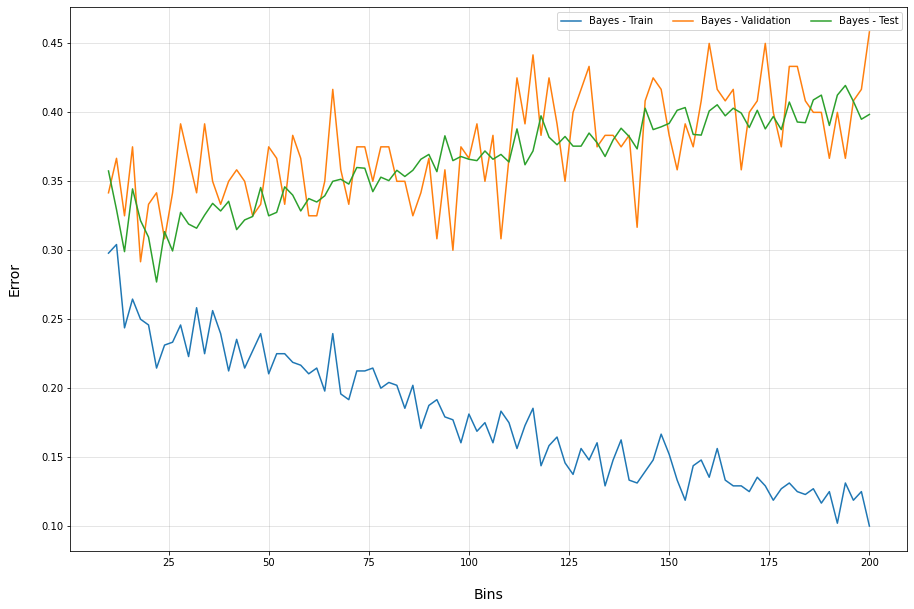

In [18]:
graph_errores_ej4(df_errores, 'Bins')

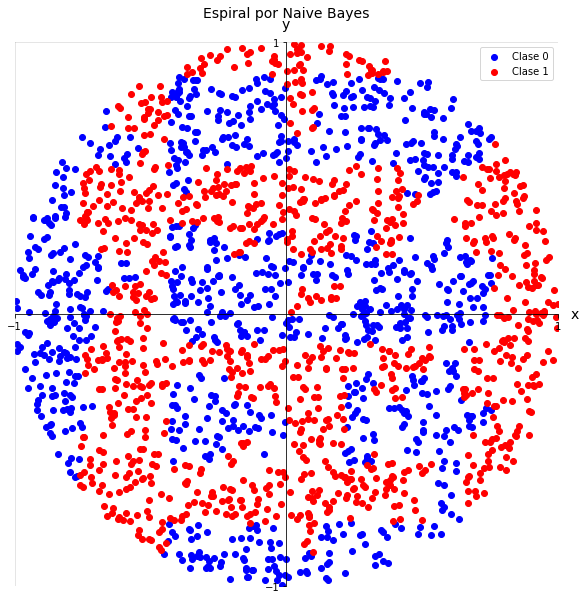

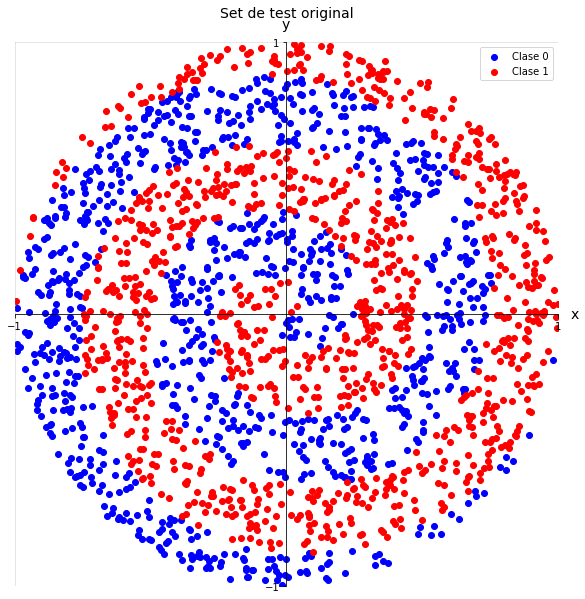

In [19]:
GraficadorDF(df_test_entrenado).graph_puntos(titulo=f"Espiral por Naive Bayes")
GraficadorDF(df_test).graph_puntos(titulo=f"Set de test original")

En este caso, no parecen dibujarse correctamente las espirales. El error obtenido es muy alto (no baja de 0.3) y se produce sobreajuste a medida que aumenta la cantidad de bins. Podría suponer que en el problema anterior es más fácil seccionar el gráfico en rectas, dado que en las espirales hay muchas más curvas. 